# 1. 데이터 준비

### 1) 라이브러리 임포트하기

In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [110]:
import os
os.name

if os.name == "posix":
    sns.set(font="AppleGothic")
elif os.name == "nt":
    sns.set(font="Malgun Gothic")

### 2) 데이터셋 로드하기

In [84]:
df = pd.read_csv('./data/101_DT_1KE10081_20231106160107.csv', encoding='cp949')
df.shape

(969, 30)

In [85]:
df['지역별'].value_counts()

합계         51
유럽         51
아프리카       51
중남미        51
대양주        51
기타 유럽      51
영국         51
유럽연합       51
유럽연합+영국    51
캐나다        51
아시아        51
미국         51
북미         51
기타 아시아     51
중동         51
아세안        51
일본         51
중국         51
기타         51
Name: 지역별, dtype: int64

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 969 entries, 0 to 968
Data columns (total 30 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   지역별          969 non-null    object 
 1   상품군별         969 non-null    object 
 2   판매유형별        969 non-null    object 
 3   항목           969 non-null    object 
 4   단위           969 non-null    object 
 5   2014.1/4     150 non-null    float64
 6   2014.2/4     150 non-null    float64
 7   2014.3/4     150 non-null    float64
 8   2014.4/4     150 non-null    float64
 9   2015.1/4     150 non-null    float64
 10  2015.2/4     150 non-null    float64
 11  2015.3/4     150 non-null    float64
 12  2015.4/4     150 non-null    float64
 13  2016.1/4     150 non-null    float64
 14  2016.2/4     150 non-null    float64
 15  2016.3/4     150 non-null    float64
 16  2016.4/4     150 non-null    float64
 17  2017.1/4     969 non-null    object 
 18  2017.2/4     969 non-null    object 
 19  2017.3/4

In [87]:
df.describe().head()

,2014.1/4,2014.2/4,2014.3/4,2014.4/4,2015.1/4,2015.2/4,2015.3/4,2015.4/4,2016.1/4,2016.2/4,2016.3/4,2016.4/4,Unnamed: 29
count,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.00000,150.000000,150.000000,150.000000,0.0
mean,3953.920000,4097.093333,4373.306667,5685.760000,7176.026667,7247.573333,7157.893333,12015.146667,13637.20000,13183.760000,14956.080000,19379.760000,NaN
std,14316.406803,15294.262587,16484.779102,22380.618718,30202.367950,31248.705252,30332.916978,55268.962799,64518.94157,61849.273377,73675.967574,96241.769115,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,NaN
25%,93.250000,88.000000,102.250000,109.000000,113.750000,108.000000,102.000000,67.000000,82.75000,72.750000,70.750000,77.750000,NaN


# 2. 데이터 전처리

### 2.1 필요없는 컬럼 삭제하기 - '항목', '단위', 'Unnamed: 29'

In [88]:
df = df.drop(['항목', '단위', 'Unnamed: 29'], axis=1)
df.shape

(969, 27)

In [89]:
df.head()

,지역별,상품군별,판매유형별,2014.1/4,2014.2/4,2014.3/4,2014.4/4,2015.1/4,2015.2/4,2015.3/4,...,2017.3/4,2017.4/4,2018.1/4,2018.2/4,2018.3/4,2018.4/4,2019.1/4,2019.2/4,2019.3/4,2019.4/4
0,합계,합계,계,148272.0,153641.0,163999.0,213216.0,269101.0,271784.0,268421.0,...,755101,858240,833672,897205,921586,974060,1251122,1345723,1526135,1881628
1,합계,합계,면세점,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,610630,677884,665613,725319,761836,770656,1070693,1157158,1336372,1655635
2,합계,합계,면세점 이외,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,144471,180356,168059,171886,159750,203404,180429,188565,189763,225993
3,합계,컴퓨터 및 주변기기,계,4915.0,4052.0,3912.0,3529.0,2903.0,2697.0,3804.0,...,2032,2158,5236,3854,4320,4511,3702,4038,3670,3827
4,합계,컴퓨터 및 주변기기,면세점,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5,1,2,6,1,215,2,0,1,70


### 2.2 melt 함수를 활용해서 tidy data로 구성하기

In [90]:
df.columns

Index(['지역별', '상품군별', '판매유형별', '2014.1/4', '2014.2/4', '2014.3/4', '2014.4/4',
       '2015.1/4', '2015.2/4', '2015.3/4', '2015.4/4', '2016.1/4', '2016.2/4',
       '2016.3/4', '2016.4/4', '2017.1/4', '2017.2/4', '2017.3/4', '2017.4/4',
       '2018.1/4', '2018.2/4', '2018.3/4', '2018.4/4', '2019.1/4', '2019.2/4',
       '2019.3/4', '2019.4/4'],
      dtype='object')

In [91]:
print(df['상품군별'].value_counts())
print("-" * 100)
print(df['판매유형별'].value_counts())

합계               57
의류 및 패션 관련 상품    57
생활·자동차용품         57
농축수산물            57
음·식료품            57
아동·유아용품          57
화장품              57
스포츠·레저용품         57
음반·비디오·악기        57
컴퓨터 및 주변기기       57
사무·문구            57
서 적              57
소프트웨어            57
통신기기             57
가전·전자            57
가전·전자·통신기기       57
기 타              57
Name: 상품군별, dtype: int64
----------------------------------------------------------------------------------------------------
계         323
면세점       323
면세점 이외    323
Name: 판매유형별, dtype: int64


In [92]:
df_new = df.melt(id_vars=['지역별', '상품군별', '판매유형별'], var_name='기간', value_name='백만원')
df_new.shape

(23256, 5)

In [93]:
df_new.head()

,지역별,상품군별,판매유형별,기간,백만원
0,합계,합계,계,2014.1/4,148272.0
1,합계,합계,면세점,2014.1/4,NaN
2,합계,합계,면세점 이외,2014.1/4,NaN
3,합계,컴퓨터 및 주변기기,계,2014.1/4,4915.0
4,합계,컴퓨터 및 주변기기,면세점,2014.1/4,NaN


In [94]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23256 entries, 0 to 23255
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   지역별     23256 non-null  object
 1   상품군별    23256 non-null  object
 2   판매유형별   23256 non-null  object
 3   기간      23256 non-null  object
 4   백만원     13428 non-null  object
dtypes: object(5)
memory usage: 908.6+ KB


### 2.3 기간에서 연도 분리하기

In [95]:
df_new['연도'] = df_new['기간'].map(lambda x: int(x.split('.')[0]))
df_new

,지역별,상품군별,판매유형별,기간,백만원,연도
0,합계,합계,계,2014.1/4,148272.0,2014
1,합계,합계,면세점,2014.1/4,NaN,2014
2,합계,합계,면세점 이외,2014.1/4,NaN,2014
3,합계,컴퓨터 및 주변기기,계,2014.1/4,4915.0,2014
4,합계,컴퓨터 및 주변기기,면세점,2014.1/4,NaN,2014
...,...,...,...,...,...,...
23251,기타,생활·자동차용품,면세점,2019.4/4,0,2019
23252,기타,생활·자동차용품,면세점 이외,2019.4/4,531,2019
23253,기타,기 타,계,2019.4/4,1094,2019
23254,기타,기 타,면세점,2019.4/4,1,2019


### 2.4 기간에서 분기 분리하기

In [96]:
df_new['분기'] = df_new['기간'].map(lambda x: int(str(x.split('.')[1]).split('/')[0]))
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23256 entries, 0 to 23255
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   지역별     23256 non-null  object
 1   상품군별    23256 non-null  object
 2   판매유형별   23256 non-null  object
 3   기간      23256 non-null  object
 4   백만원     13428 non-null  object
 5   연도      23256 non-null  int64 
 6   분기      23256 non-null  int64 
dtypes: int64(2), object(5)
memory usage: 1.2+ MB


### 2.5 금액을 수치 데이터로 표현하기 위해 데이터 타입 변경

In [97]:
df_new['백만원'] = df_new['백만원'].replace('-', pd.np.nan).astype(dtype='float64')

/var/folders/cy/sw8s66dd02l8b9dj7pqk2ljm0000gn/T/ipykernel_20151/2284103331.py:1: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  df_new['백만원'] = df_new['백만원'].replace('-', pd.np.nan).astype(dtype='float64')


In [99]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23256 entries, 0 to 23255
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   지역별     23256 non-null  object 
 1   상품군별    23256 non-null  object 
 2   판매유형별   23256 non-null  object 
 3   기간      23256 non-null  object 
 4   백만원     7200 non-null   float64
 5   연도      23256 non-null  int64  
 6   분기      23256 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 1.2+ MB


### 2.6 필요없는 데이터 제거하기

In [102]:
df_new = df_new[(df_new['지역별'] != '합계') & (df_new['상품군별'] != '합계')].copy()
df_new

,지역별,상품군별,판매유형별,기간,백만원,연도,분기
54,아시아,컴퓨터 및 주변기기,계,2014.1/4,NaN,2014,1
55,아시아,컴퓨터 및 주변기기,면세점,2014.1/4,NaN,2014,1
56,아시아,컴퓨터 및 주변기기,면세점 이외,2014.1/4,NaN,2014,1
57,아시아,가전·전자·통신기기,계,2014.1/4,NaN,2014,1
58,아시아,가전·전자·통신기기,면세점,2014.1/4,NaN,2014,1
...,...,...,...,...,...,...,...
23251,기타,생활·자동차용품,면세점,2019.4/4,0.0,2019,4
23252,기타,생활·자동차용품,면세점 이외,2019.4/4,531.0,2019,4
23253,기타,기 타,계,2019.4/4,1094.0,2019,4
23254,기타,기 타,면세점,2019.4/4,1.0,2019,4


In [103]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20736 entries, 54 to 23255
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   지역별     20736 non-null  object 
 1   상품군별    20736 non-null  object 
 2   판매유형별   20736 non-null  object 
 3   기간      20736 non-null  object 
 4   백만원     6048 non-null   float64
 5   연도      20736 non-null  int64  
 6   분기      20736 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 1.3+ MB


In [105]:
df_new.isnull().sum()

지역별          0
상품군별         0
판매유형별        0
기간           0
백만원      14688
연도           0
분기           0
dtype: int64

# 3. 전체 상품군별 시각화

### 3.1 전체 상품군 판매액 시각화

In [108]:
df_total = df_new[df_new['판매유형별'] == '계'].copy()
df_total.head()

,지역별,상품군별,판매유형별,기간,백만원,연도,분기
54,아시아,컴퓨터 및 주변기기,계,2014.1/4,NaN,2014,1
57,아시아,가전·전자·통신기기,계,2014.1/4,NaN,2014,1
60,아시아,가전·전자,계,2014.1/4,NaN,2014,1
63,아시아,통신기기,계,2014.1/4,NaN,2014,1
66,아시아,소프트웨어,계,2014.1/4,NaN,2014,1


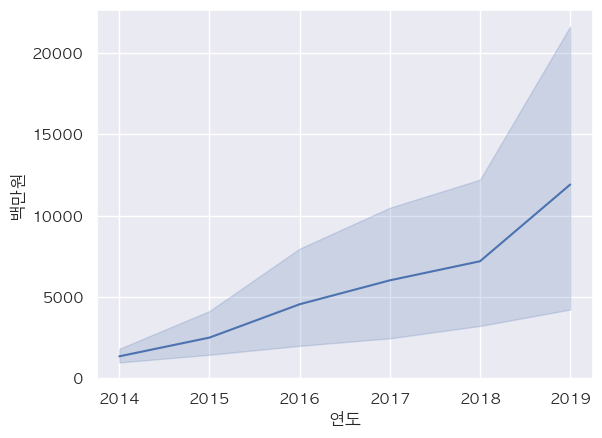

In [111]:
sns.lineplot(data=df_total, x='연도', y='백만원')
plt.show()

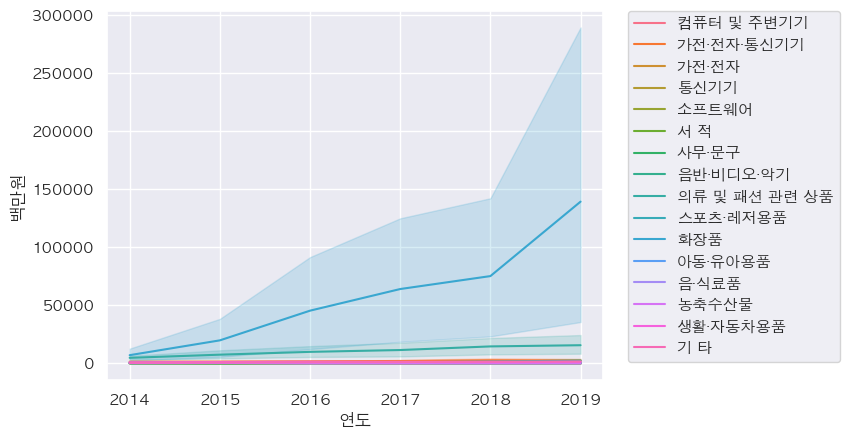

In [114]:
sns.lineplot(data=df_total, x='연도', y='백만원', hue='상품군별')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()